In [45]:
# Install additional libraries
!pip install plotly xgboost

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [46]:
df = pd.read_csv('/content/GojekAppReview.csv')
df.head()

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3


**EDA & Preprocessing**

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
sum(df['appVersion'].str.startswith("4.8"))

8091

In [49]:
# ambil kolom yg dibutuhkan
df['appVersion'] = df['appVersion'].fillna('Unknown') # Fill missing values with 'Unknown'
df = df[df['appVersion'].str.startswith("4.8")]
df = df.loc[:, ['userName', 'content', 'score']]

df.head()

,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4
135,Nyauw Jin Fie,Good,5
136,Tanaka Kun,Good,5
137,Anton S.,Sangat membantu,5


In [50]:
import nltk

# Download the 'punkt_tab' dataset
nltk.download('punkt_tab')

# tokenization
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk # Import nltk

# Download the 'stopwords' dataset
nltk.download('stopwords') # Download stopwords

# hapus duplikasi
df = df.dropna(subset=['content']).drop_duplicates()

# stopwords
stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
df['content'] = df['content'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

# normalisasi teks
df['content'] = df['content'].apply(lambda x: ' '.join(x))

df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,userName,content,score
133,Abu karim aljabbar Mkatiksaidi,ramah banget,5
134,Fathan Mubina,update nggak dibuka,4
135,Nyauw Jin Fie,good,5
136,Tanaka Kun,good,5
137,Anton S.,membantu,5


In [51]:
!pip install Sastrawi
!pip install VaderSentiment

In [52]:
!pip install Sastrawi
!pip install VaderSentiment # it's a good practice to install all the library in one place

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming
def stem_text(tokens):
    return [stemmer.stem(token) for token in tokens]

# Stemming
    stemmed_tokens = stem_text(cleaned_tokens)
    return ' '.join(stemmed_tokens)

In [54]:
# Install additional libraries
!pip install plotly xgboost

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Load the DataFrame
df = pd.read_csv('/content/GojekAppReview.csv') # Make sure this path is correct
df.head()

# ... (Rest of your code, including data cleaning, preprocessing, etc.) ...

# labelling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}
# Filter out rows where 'content' is not a string
df = df[df['content'].apply(lambda x: isinstance(x, str))]

# Perform sentiment analysis
df['sentimen'] = df['content'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))

In [55]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['content'])

**Analisis Sentimen**

In [56]:
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

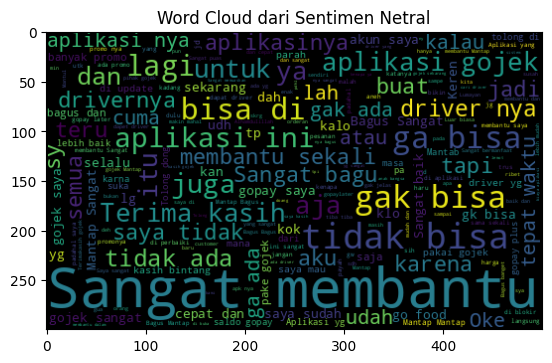

In [57]:
df_netral = df[df['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

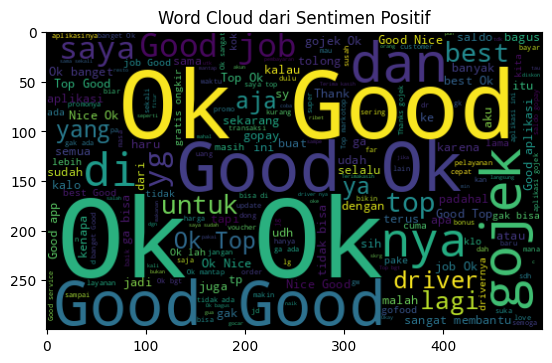

In [58]:
df_positif = df[df['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in df_positif['content']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

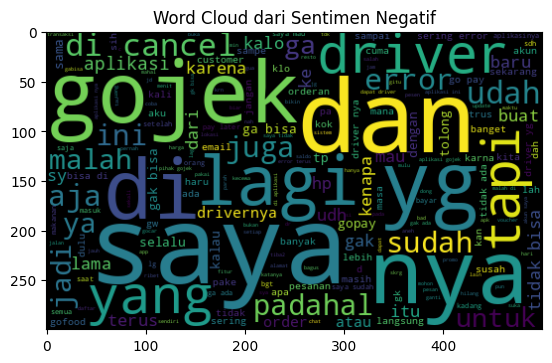

In [59]:
df_negatif = df[df['sentimen'] == 'Negatif']
all_words_negatif = ' '.join([twts for twts in df_negatif['content']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
# plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

Distribusi Target

In [63]:
temp = df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
1,Netral,181715
2,Positif,36975
0,Negatif,6310


<Axes: xlabel='sentimen', ylabel='count'>

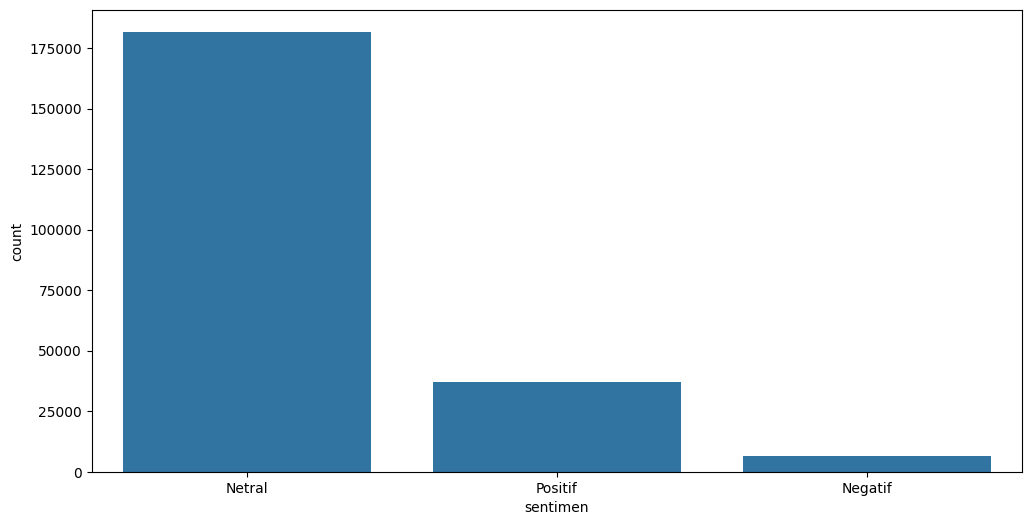

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df)

In [65]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentimen,
    values = temp.content,
    title = {"position": "top center", "text": "Funnel-Chart dari Distribusi target"}
    ))
fig.show()

In [66]:
!pip install palettable
from palettable.colorbrewer.qualitative import Pastel1_7

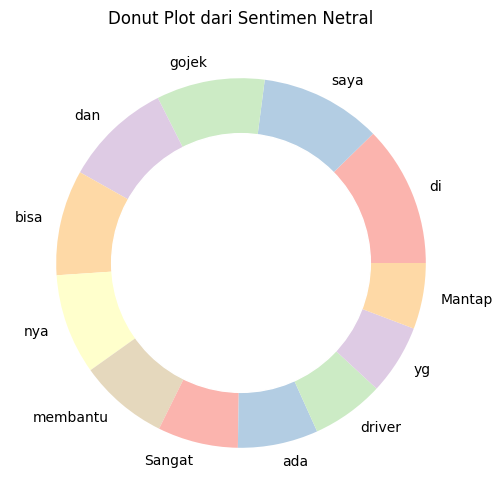

In [67]:
unique_netral_words = df_netral['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_netral_words.columns = ['words', 'count']
top_20_words = unique_netral_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen Netral')
plt.show()

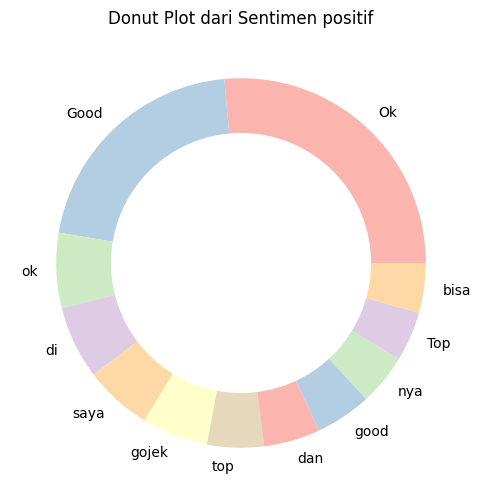

In [71]:
unique_positif_words = df_positif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_positif_words.columns = ['words', 'count']
top_20_words = unique_positif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen positif')
plt.show()

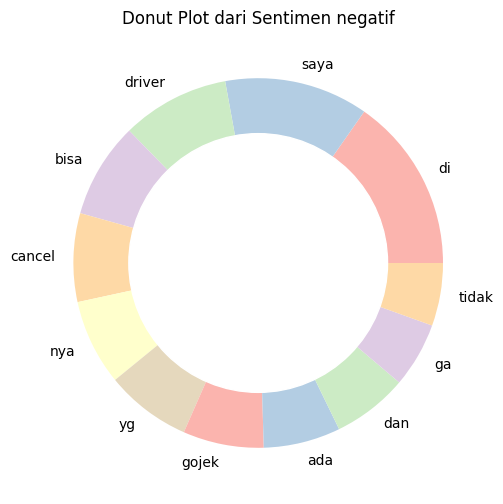

In [72]:
unique_negatif_words = df_negatif['content'].str.split(expand=True).stack().value_counts().reset_index()
unique_negatif_words.columns = ['words', 'count']
top_20_words = unique_negatif_words.head(12)
plt.figure(figsize=(12, 6))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(top_20_words['count'], labels=top_20_words['words'], colors=Pastel1_7.hex_colors)
plt.gca().add_artist(my_circle)
plt.title('Donut Plot dari Sentimen negatif')
plt.show()

SPLIT

In [73]:
# splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentimen'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((180000, 76282), (45000, 76282))

Resampling target

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



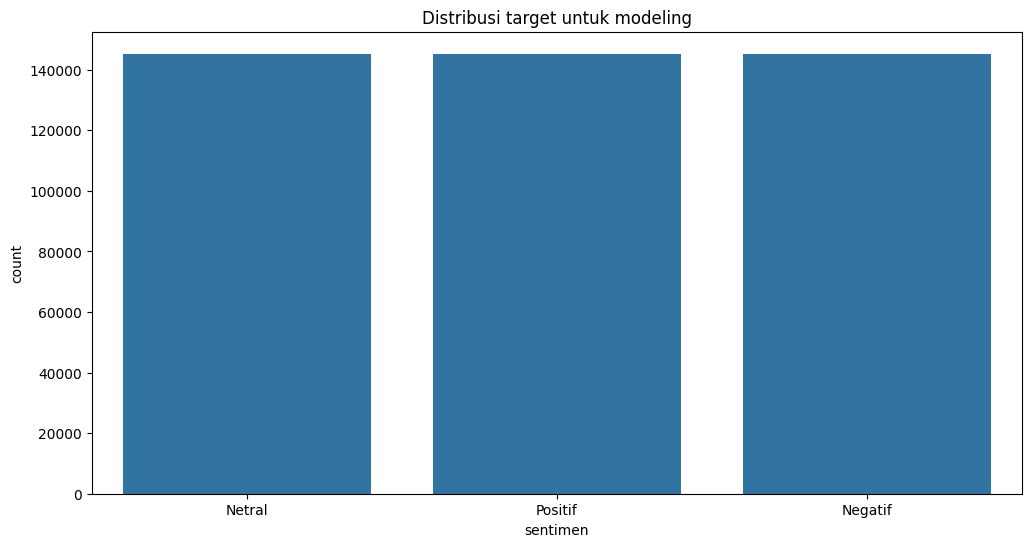

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 6))
sns.countplot(x=y_train)
plt.title('Distribusi target untuk modeling')
plt.show()

**Model**

In [75]:
# prompt: Buatkan model naive bayes

from sklearn.naive_bayes import MultinomialNB

# Inisialisasi model Naive Bayes
nb_model = MultinomialNB()

# Training model
nb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_nb = nb_model.predict(X_test)

# Evaluasi model (contoh: akurasi)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Model Naive Bayes: {accuracy}")

Akurasi Model Naive Bayes: 0.775


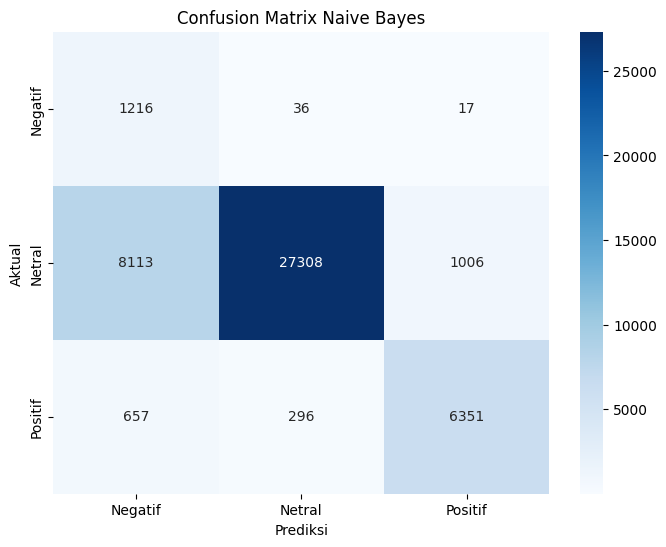

In [78]:
# visualisasi hasil naive bayes

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred_nb are already defined from your previous code

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

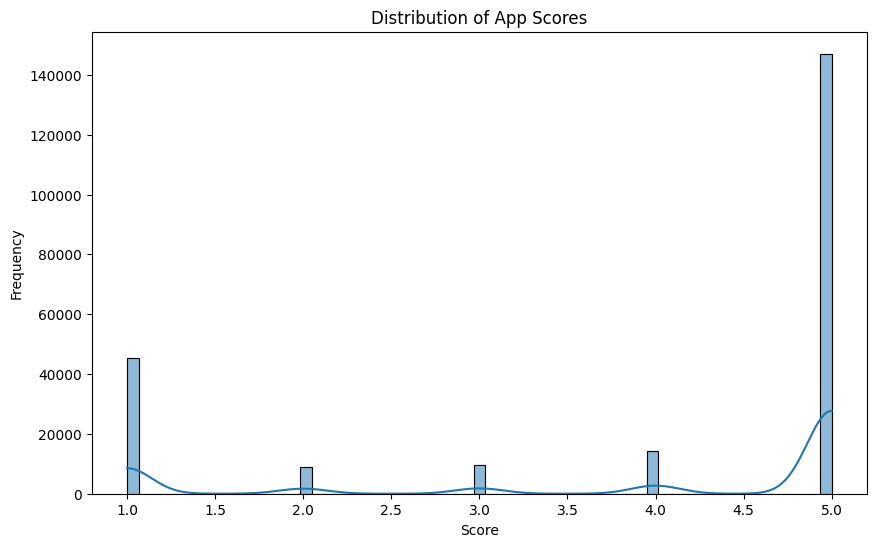

In [77]:
# visualisasi yang lain

# Plotting the distribution of scores using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], kde=True)
plt.title('Distribution of App Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()